In [24]:
#save_file_count=0
#table_save_dir_path="table_3-2-house-prices"

In [54]:
#csv保存用
#save_file_count+=1
#with open("saved_file_"+str(save_file_count)+".txt","w") as save_table_file:
    #try:
        #save_table_file.write(str(train))
    #except: pass
#train.to_csv(table_save_dir_path+"/"+"train_arranged_"+str(save_file_count)+".csv")
#test.to_csv(table_save_dir_path+"/"+"test_arranged_"+str(save_file_count)+".csv")
#df.to_csv(table_save_dir_path+"/"+"df_arranged_"+str(save_file_count)+".csv")
#sub.to_csv(table_save_dir_path+"/"+"sub_arranged_"+str(save_file_count)+".csv")


In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

input/test.csv
input/data_description.txt
input/train.csv
input/sample_submission.csv


In [26]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 1000)
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [27]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [30]:
from collections import Counter
num_col = train.loc[:,'MSSubClass':'SaleCondition'].select_dtypes(exclude=['object']).columns
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2, num_col)
train.loc[Outliers_to_drop] # Show the outliers rows


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
93      94         190  C (all)         60.0     7200   Pave   NaN      Reg   
125    126         190       RM         60.0     6780   Pave   NaN      Reg   
165    166         190       RL         62.0    10106   Pave   NaN      Reg   
172    173         160       RL         44.0     5306   Pave   NaN      IR1   
246    247         190       RM         69.0     9142   Pave  Grvl      Reg   
291    292         190       RL         55.0     5687   Pave  Grvl      Reg   
335    336         190       RL          NaN   164660   Grvl   NaN      IR1   
344    345         160       RM         36.0     2592   Pave   NaN      Reg   
504    505         160       RL         24.0     2308   Pave   NaN      Reg   
520    521         190       RL         60.0    10800   Pave  Grvl      Reg   
635    636         190       RH         60.0    10896   Pave  Pave      Reg   
703    704         190       RM         76.0     7630   Pave   NaN      Reg   
705    706         190       RM         70.0     5600   Pave   NaN      Reg   
1030  1031         190       RH          NaN     7082   Pave   NaN      Reg   
1062  1063         190       RM         85.0    13600   Pave  Grvl      Reg   
1068  1069         160       RM         42.0     3964   Pave   NaN      Reg   
1190  1191         190       RL          NaN    32463   Pave   NaN      Reg   
1266  1267         190       RM         60.0    10120   Pave   NaN      IR1   
1393  1394         190       RM         60.0    10800   Pave  Pave      Reg   
1416  1417         190       RM         60.0    11340   Pave   NaN      Reg   
53      54          20       RL         68.0    50271   Pave   NaN      IR1   
113    114          20       RL          NaN    21000   Pave   NaN      Reg   
185    186          75       RM         90.0    22950   Pave   NaN      IR2   
197    198          75       RL        174.0    25419   Pave   NaN      Reg   
249    250          50       RL          NaN   159000   Pave   NaN      IR2   
260    261          80       RL        120.0    19296   Pave   NaN      Reg   
304    305          75       RM         87.0    18386   Pave   NaN      Reg   
313    314          20       RL        150.0   215245   Pave   NaN      IR3   
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
529    530          20       RL          NaN    32668   Pave   NaN      IR1   
588    589          20       RL         65.0    25095   Pave   NaN      IR1   
661    662          60       RL         52.0    46589   Pave   NaN      IR2   
664    665          20       RL         49.0    20896   Pave   NaN      IR2   
666    667          60       RL          NaN    18450   Pave   NaN      IR1   
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
726    727          20       RL          NaN    21695   Pave   NaN      IR1   
769    770          60       RL         47.0    53504   Pave   NaN      IR2   
828    829          60       RL          NaN    28698   Pave   NaN      IR2   
848    849          50       RL         75.0    45600   Pave   NaN      IR2   
854    855          20       RL        102.0    17920   Pave   NaN      Reg   
1061  1062          30  C (all)        120.0    18000   Grvl   NaN      Reg   
1173  1174          50       RL        138.0    18030   Pave   NaN      IR1   
1184  1185          20       RL         50.0    35133   Grvl   NaN      Reg   
1230  1231          90       RL          NaN    18890   Pave   NaN      IR1   
1287  1288          20       RL          NaN    36500   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
1346  1347          20       RL          NaN    20781   Pave   NaN      IR2   
1396  1397          20       RL          NaN    57200   Pave   NaN      IR1   
1423  1424          80       RL          NaN    19690   Pa

In [32]:
# Drop outliers
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [34]:
df = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))

In [36]:
# before tuning
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(df)

Missing value  N unique value    dtype
MSSubClass                 0              16    int64
MSZoning                   4               5   object
LotFrontage              456             127  float64
LotArea                    0            1872    int64
Street                     0               2   object
Alley                   2611               2   object
LotShape                   0               4   object
LandContour                0               4   object
Utilities                  2               1   object
LotConfig                  0               5   object
LandSlope                  0               3   object
Neighborhood               0              25   object
Condition1                 0               9   object
Condition2                 0               7   object
BldgType                   0               5   object
HouseStyle                 0               8   object
OverallQual                0              10    int64
OverallCond                0               9    int64
YearBuilt                  0             114    int64
YearRemodAdd               0              61    int64
RoofStyle                  0               6   object
RoofMatl                   0               7   object
Exterior1st                1              15   object
Exterior2nd                1              16   object
MasVnrType                23               4   object
MasVnrArea                22             429  float64
ExterQual                  0               4   object
ExterCond                  0               5   object
Foundation                 0               6   object
BsmtQual                  75               4   object
BsmtCond                  76               4   object
BsmtExposure              76               4   object
BsmtFinType1              73               6   object
BsmtFinSF1                 1             961  float64
BsmtFinType2              74               6   object
BsmtFinSF2                 1             248  float64
BsmtUnfSF                  1            1111  float64
TotalBsmtSF                1            1026  float64
Heating                    0               6   object
HeatingQC                  0               5   object
CentralAir                 0               2   object
Electrical                 1               5   object
1stFlrSF                   0            1046    int64
2ndFlrSF                   0             599    int64
LowQualFinSF               0              26    int64
GrLivArea                  0            1231    int64
BsmtFullBath               2               4  float64
BsmtHalfBath               2               3  float64
FullBath                   0               5    int64
HalfBath                   0               3    int64
BedroomAbvGr               0               7    int64
KitchenAbvGr               0               4    int64
KitchenQual                1               4   object
TotRmsAbvGrd               0              12    int64
Functional                 2               7   object
Fireplaces                 0               5    int64
FireplaceQu             1376               5   object
GarageType               141               6   object
GarageYrBlt              143             102  float64
GarageFinish             143               3   object
GarageCars                 1               6  float64
GarageArea                 1             586  float64
GarageQual               143               5   object
GarageCond               143               5   object
PavedDrive                 0               3   object
WoodDeckSF                 0             363    int64
OpenPorchSF                0             238    int64
EnclosedPorch              0             174    int64
3SsnPorch                  0              28    int64
ScreenPorch                0             111    int64
PoolArea                   0               9    int64
PoolQC                  2792               3   object
Fence                   2252               4   object
MiscFeature        

In [38]:
scaler = MinMaxScaler((-1,1))

df['BsmtFinSF2_sc'] = scaler.fit_transform(df[['BsmtFinSF2']])
df['BsmtFinSF2_sc'].fillna(0,inplace=True)
df['LowQualFinSF_sc'] = scaler.fit_transform(df[['LowQualFinSF']])
df['WoodDeckSF_sc'] = scaler.fit_transform(df[['WoodDeckSF']])
df['OpenPorchSF_sc'] = scaler.fit_transform(df[['OpenPorchSF']])
df['EnclosedPorch_sc'] = scaler.fit_transform(df[['EnclosedPorch']])
df['3SsnPorch_sc'] = scaler.fit_transform(df[['3SsnPorch']])
df['ScreenPorch_sc'] = scaler.fit_transform(df[['ScreenPorch']])
df['MiscVal_sc'] = scaler.fit_transform(df[['MiscVal']])

df['MSZoning'].fillna('N')
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)
df['Alley'].fillna('N')
df['Exterior1st'].fillna('N')
df['Exterior2nd'].fillna('N')
df['Utilities'].fillna('N')
df['MasVnrType'].fillna('N')
df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'].fillna(0)
df['FullBath'].fillna(0)
df['HalfBath'].fillna(0)
df['KitchenQual'].fillna('N')
df['Functional'].fillna('N')
df['FireplaceQu'].fillna('N')
df['GarageType'].fillna('N')
df['GarageYrBlt'].fillna(0,inplace=True)
df['GarageFinish'].fillna('N')
df['GarageCars'].fillna(0)
df['GarageArea'].fillna(0,inplace=True)
df['GarageQual'].fillna('N')
df['GarageCond'].fillna('N')
df['BsmtFinSF2'].fillna(0,inplace=True)
df['MasVnrArea'].fillna(0,inplace=True)
df['BsmtFinSF1'].fillna(0,inplace=True)
df['SaleType'].fillna('N')
df['BsmtUnfSF'].fillna(0,inplace=True)
df['TotalBsmtSF'].fillna(0,inplace=True)
df['PoolQC'].fillna('N')
df['Fence'].fillna('N')
df['MiscFeature'].fillna('N')
df['BsmtQual'].fillna('N')
df['BsmtCond'].fillna('N')
df['BsmtExposure'].fillna('N')
df['BsmtFinType1'].fillna('N')
df['BsmtFinType2'].fillna('N')
df['Electrical'].fillna('N')
df["AllSF"] = df["GrLivArea"] + df["TotalBsmtSF"]
df['Area'] = df['LotArea']*df['LotFrontage']
df['Area_log'] = np.log1p(df['Area'])

def Gar_category(cat):
    if cat <= 250:
        return 1
    elif cat <= 500 and cat > 250:
        return 2
    elif cat <= 1000 and cat > 500:
        return 3
    return 4
df['GarageArea_cat'] = df['GarageArea'].apply(Gar_category)

def Low_category(cat):
    if cat <= 1000:
        return 1
    elif cat <= 2000 and cat > 1000:
        return 2
    elif cat <= 3000 and cat > 2000:
        return 3
    return 4
df['GrLivArea_cat'] = df['GrLivArea'].apply(Low_category)

def fl1_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
df['1stFlrSF_cat'] = df['1stFlrSF'].apply(fl1_category)
df['2ndFlrSF_cat'] = df['2ndFlrSF'].apply(fl1_category)

def bsmtt_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
df['TotalBsmtSF_cat'] = df['TotalBsmtSF'].apply(bsmtt_category)

def bsmt_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
df['BsmtUnfSF_cat'] = df['BsmtUnfSF'].apply(bsmt_category)

def lot_category(cat):
    if cat <= 50:
        return 1
    elif cat <= 100 and cat > 50:
        return 2
    elif cat <= 150 and cat > 100:
        return 3
    return 4
df['LotFrontage_cat'] = df['LotFrontage'].apply(lot_category)

def lot_category1(cat):
    if cat <= 5000:
        return 1
    elif cat <= 10000 and cat > 5000:
        return 2
    elif cat <= 15000 and cat > 10000:
        return 3
    elif cat <= 20000 and cat > 15000:
        return 4
    elif cat <= 25000 and cat > 20000:
        return 5
    return 6
df['LotArea_cat'] = df['LotArea'].apply(lot_category1)

def year_category(yb):
    if yb <= 1910:
        return 1
    elif yb <= 1950 and yb > 1910:
        return 2
    elif yb >= 1950 and yb < 1980:
        return 3
    elif yb >= 1980 and yb < 2000:
        return 4
    return 5



df['YearBuilt_cat'] = df['YearBuilt'].apply(year_category) 
df['YearRemodAdd_cat'] = df['YearRemodAdd'].apply(year_category)
df['GarageYrBlt_cat'] = df['GarageYrBlt'].apply(year_category)

def vnr_category(cat):
    if cat <= 250:
        return 1
    elif cat <= 500 and cat > 250:
        return 2
    elif cat <= 750 and cat > 500:
        return 3
    return 4

df['MasVnrArea_cat'] = df['MasVnrArea'].apply(vnr_category)

def allsf_category(yb):
    if yb <= 1000:
        return 1
    elif yb <= 2000 and yb > 1000:
        return 2
    elif yb >= 3000 and yb < 2000:
        return 3
    elif yb >= 4000 and yb < 3000:
        return 4
    elif yb >= 5000 and yb < 4000:
        return 5
    elif yb >= 6000 and yb < 5000:
        return 6
    return 7

df['AllSF_cat'] = df['AllSF'].apply(allsf_category)


dummy_col=['YearRemodAdd', 'YearBuilt', 'AllSF_cat', 'MiscVal','OverallCond', 'OverallQual', 'BsmtFinType2', 'SaleCondition','SaleType', 'YrSold', 'MoSold', 'MiscFeature', 'Fence', 'PoolQC', 'PoolArea', 'PavedDrive', 'GarageCond', 'GarageQual', 'GarageArea_cat', 'GarageCars', 'GarageFinish', 'GarageType', 'FireplaceQu', 'Fireplaces','Functional', 'TotRmsAbvGrd', 'KitchenQual', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'BsmtFullBath','GrLivArea_cat','MSSubClass', 'MSZoning', 'LotFrontage_cat', 'LotArea_cat', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
          'BldgType', 'HouseStyle', 'YearBuilt_cat', 'YearRemodAdd_cat', 'RoofStyle', 'RoofMatl', 'Exterior2nd', 'Exterior1st', 'MasVnrType', 'MasVnrArea_cat', 'ExterQual', 'ExterCond', 'Foundation', 
          'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF_cat', 'TotalBsmtSF_cat', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF_cat', '2ndFlrSF_cat']
df = pd.get_dummies(df, columns=dummy_col, drop_first=False)

df['LotFrontage_log'] = np.log1p(df['LotFrontage'])
df['LotArea_log'] = np.log1p(df['LotArea'])
df['BsmtUnfSF_log'] = np.log1p(df['BsmtUnfSF'])

df['Is_MasVnr'] = [1 if i != 0 else 0 for i in df['MasVnrArea']]
df['Is_BsmtFinSF1'] = [1 if i != 0 else 0 for i in df['BsmtFinSF1']]
df['Is_BsmtFinSF2'] = [1 if i != 0 else 0 for i in df['BsmtFinSF2']]
df['Is_BsmtUnfSF'] = [1 if i != 0 else 0 for i in df['BsmtUnfSF']]
df['Is_TotalBsmtSF'] = [1 if i != 0 else 0 for i in df['TotalBsmtSF']]
df['Is_2ndFlrSF'] = [1 if i != 0 else 0 for i in df['2ndFlrSF']]
df['Is_LowQualFinSF'] = [1 if i != 0 else 0 for i in df['LowQualFinSF']]
df['Is_GarageArea'] = [1 if i != 0 else 0 for i in df['GarageArea']]
df['Is_WoodDeckSF'] = [1 if i != 0 else 0 for i in df['WoodDeckSF']]
df['Is_OpenPorchSF'] = [1 if i != 0 else 0 for i in df['OpenPorchSF']]
df['Is_EnclosedPorch'] = [1 if i != 0 else 0 for i in df['EnclosedPorch']]
df['Is_3SsnPorch'] = [1 if i != 0 else 0 for i in df['3SsnPorch']]
df['Is_ScreenPorch'] = [1 if i != 0 else 0 for i in df['ScreenPorch']]




In [40]:
# after tuning
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(df)

Missing value  N unique value    dtype
LotFrontage                        0             127  float64
LotArea                            0            1872    int64
MasVnrArea                         0             429  float64
BsmtFinSF1                         0             961  float64
BsmtFinSF2                         0             248  float64
BsmtUnfSF                          0            1111  float64
TotalBsmtSF                        0            1026  float64
1stFlrSF                           0            1046    int64
2ndFlrSF                           0             599    int64
LowQualFinSF                       0              26    int64
GrLivArea                          0            1231    int64
GarageYrBlt                        0             103  float64
GarageArea                         0             586  float64
WoodDeckSF                         0             363    int64
OpenPorchSF                        0             238    int64
EnclosedPorch                      0             174    int64
3SsnPorch                          0              28    int64
ScreenPorch                        0             111    int64
BsmtFinSF2_sc                      0             249  float64
LowQualFinSF_sc                    0              26  float64
WoodDeckSF_sc                      0             363  float64
OpenPorchSF_sc                     0             238  float64
EnclosedPorch_sc                   0             174  float64
3SsnPorch_sc                       0              28  float64
ScreenPorch_sc                     0             111  float64
MiscVal_sc                         0              32  float64
AllSF                              0            1424  float64
Area                               0            2114  float64
Area_log                           0            2114  float64
GarageYrBlt_cat                    0               5    int64
YearRemodAdd_1950                  0               2    uint8
YearRemodAdd_1951                  0               2    uint8
YearRemodAdd_1952                  0               2    uint8
YearRemodAdd_1953                  0               2    uint8
YearRemodAdd_1954                  0               2    uint8
YearRemodAdd_1955                  0               2    uint8
YearRemodAdd_1956                  0               2    uint8
YearRemodAdd_1957                  0               2    uint8
YearRemodAdd_1958                  0               2    uint8
YearRemodAdd_1959                  0               2    uint8
YearRemodAdd_1960                  0               2    uint8
YearRemodAdd_1961                  0               2    uint8
YearRemodAdd_1962                  0               2    uint8
YearRemodAdd_1963                  0               2    uint8
YearRemodAdd_1964                  0               2    uint8
YearRemodAdd_1965                  0               2    uint8
YearRemodAdd_1966                  0               2    uint8
YearRemodAdd_1967                  0               2    uint8
YearRemodAdd_1968                  0               2    uint8
YearRemodAdd_1969                  0               2    uint8
YearRemodAdd_1970                  0               2    uint8
YearRemodAdd_1971                  0               2    uint8
YearRemodAdd_1972                  0               2    uint8
YearRemodAdd_1973                  0               2    uint8
YearRemodAdd_1974                  0               2    uint8
YearRemodAdd_1975                  0               2    uint8
YearRemodAdd_1976                  0               2    uint8
YearRemodAdd_1977                  0               2    uint8
YearRemodAdd_1978                  0               2    uint8
YearRemodAdd_1979                  0               2    uint8
YearRemodAdd_1980                  0               2    uint8
YearRemodAdd_1981                  0               2    uint8
YearRemodAdd_1982                  0               2    uint8
YearRemodAdd_1983                  0               2   

In [42]:
df.shape

(2797, 664)

In [43]:
def descrictive_stat_feat(df):
    df = pd.DataFrame(df)
    dcol= [c for c in df.columns if df[c].nunique()>=10]
    d_median = df[dcol].median(axis=0)
    d_mean = df[dcol].mean(axis=0)
    q1 = df[dcol].apply(np.float32).quantile(0.25)
    q3 = df[dcol].apply(np.float32).quantile(0.75)
    
    #Add mean and median column to data set having more then 10 categories
    for c in dcol:
        df[c+str('_median_range')] = (df[c].astype(np.float32).values > d_median[c]).astype(np.int8)
        df[c+str('_mean_range')] = (df[c].astype(np.float32).values > d_mean[c]).astype(np.int8)
        df[c+str('_q1')] = (df[c].astype(np.float32).values < q1[c]).astype(np.int8)
        df[c+str('_q3')] = (df[c].astype(np.float32).values > q3[c]).astype(np.int8)
    return df

df = descrictive_stat_feat(df)

In [45]:
df.shape

(2797, 792)

In [46]:
# tot_cat_col = list(df.select_dtypes(include=['category']).columns)
# num_col = [c for c in df.columns if c not in tot_cat_col]

In [47]:
#creating matrices for feature selection:
X_train = df[:train.shape[0]]
X_test_fin = df[train.shape[0]:]
y = train.SalePrice
X_train['Y'] = y
df = X_train


X = df.drop('Y', axis=1)
y = df.Y

In [48]:
# import xgboost as xgb
# from sklearn.metrics import r2_score

# from sklearn.model_selection import RandomizedSearchCV

# xg_cl = xgb.XGBClassifier()
# param = {'max_depth':[3,4],
#          'learning_rate':[0.01,0.03],
#          'min_child_weight':[1,3],
#          'reg_lambda':[0.1,0.5],
#          'reg_alpha':[1,1.5],      
#          'gamma':[0.1,0.5],
#          'subsample':[0.4,0.5],
#         'colsample_bytree':[0.4,0.5],
# }
# clf = RandomizedSearchCV(xg_cl,param,verbose=10)

# clf.fit(X,y)
# print('Best roc_auc: {:.4}, with best params: {}'.format(clf.best_score_, clf.best_params_))

In [49]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


X = df.drop('Y', axis=1)
y = df.Y



params = {
        'objective':'reg:linear',
        'n_estimators': 1000,
        'booster':'gbtree',
        'max_depth':2,
        'eval_metric':'mae',
        'learning_rate':0.005, 
        'min_child_weight':2,
        'subsample':0.7,
        'colsample_bytree':0.8,
        'seed':29,
        'reg_alpha':1,
        'gamma':0,
        'nthread':-1

}


x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(X_test_fin)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=50, maximize=False, verbose_eval=10)

p_test = clf.predict(d_test)

# cv_result = xgb.cv(params, 
#                   d_train, 
#                   num_boost_round=2000, # increase to have better results (~700)
#                   early_stopping_rounds=50,
#                   verbose_eval=10, 
#                   show_stdv=False
#                  )

[19:34:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-mae:176552	valid-mae:173778
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 50 rounds.
[10]	train-mae:168002	valid-mae:165376
[20]	train-mae:159835	valid-mae:157307
[30]	train-mae:152065	valid-mae:149661
[40]	train-mae:144652	valid-mae:142366
[50]	train-mae:137613	valid-mae:135476
[60]	train-mae:130944	valid-mae:128911
[70]	train-mae:124572	valid-mae:122650
[80]	train-mae:118555	valid-mae:116700
[90]	train-mae:112819	valid-mae:111074
[100]	train-mae:107384	valid-mae:105718
[110]	train-mae:102215	valid-mae:100641
[120]	train-mae:97289.7	valid-mae:95779.4
[130]	train-mae:92612.9	valid-mae:91150.6
[140]	train-mae:88193.1	valid-mae:86830.9
[150]	train-mae:84028.4	valid-mae:82726.6
[160]	train-mae:80057.2	valid-mae:78818.8
[170]	train-mae:76317.9	valid-mae:75136.9
[180]	train-mae:7276

[1900]	train-mae:12895.7	valid-mae:14585.7
[1910]	train-mae:12873.5	valid-mae:14573.3
[1920]	train-mae:12853	valid-mae:14554.6
[1930]	train-mae:12833.5	valid-mae:14544.2
[1940]	train-mae:12813.2	valid-mae:14532
[1950]	train-mae:12794.5	valid-mae:14520.3
[1960]	train-mae:12779.3	valid-mae:14506.5
[1970]	train-mae:12762.3	valid-mae:14495.9
[1980]	train-mae:12745.9	valid-mae:14488.7
[1990]	train-mae:12728.7	valid-mae:14476.6
[2000]	train-mae:12707.6	valid-mae:14458.2
[2010]	train-mae:12687	valid-mae:14446.8
[2020]	train-mae:12668	valid-mae:14428.3
[2030]	train-mae:12652.3	valid-mae:14420.9
[2040]	train-mae:12632.8	valid-mae:14405.6
[2050]	train-mae:12614.6	valid-mae:14393.2
[2060]	train-mae:12595.4	valid-mae:14383.2
[2070]	train-mae:12581.1	valid-mae:14378.5
[2080]	train-mae:12564.5	valid-mae:14364.3
[2090]	train-mae:12549.3	valid-mae:14349.2
[2100]	train-mae:12530.9	valid-mae:14338.3
[2110]	train-mae:12515.6	valid-mae:14328.3
[2120]	train-mae:12497.4	valid-mae:14319.8
[2130]	train-mae:12

[3830]	train-mae:10487.4	valid-mae:13167.4
[3840]	train-mae:10479.4	valid-mae:13168.5
[3850]	train-mae:10471.1	valid-mae:13165.7
[3860]	train-mae:10462.2	valid-mae:13160.5
[3870]	train-mae:10453.4	valid-mae:13156.5
[3880]	train-mae:10443.3	valid-mae:13153.7
[3890]	train-mae:10433.2	valid-mae:13148.2
[3900]	train-mae:10424.6	valid-mae:13147.6
[3910]	train-mae:10416.4	valid-mae:13143.1
[3920]	train-mae:10407.6	valid-mae:13140.8
[3930]	train-mae:10399.8	valid-mae:13137.7
[3940]	train-mae:10393.7	valid-mae:13135.5
[3950]	train-mae:10384.3	valid-mae:13128.7
[3960]	train-mae:10375.8	valid-mae:13126.6
[3970]	train-mae:10365.9	valid-mae:13123.7
[3980]	train-mae:10358	valid-mae:13120.3
[3990]	train-mae:10350.1	valid-mae:13112.7
[4000]	train-mae:10343.4	valid-mae:13111.3
[4010]	train-mae:10334.1	valid-mae:13105.5
[4020]	train-mae:10323.4	valid-mae:13101.3
[4030]	train-mae:10315.9	valid-mae:13093
[4040]	train-mae:10307.3	valid-mae:13090.5
[4050]	train-mae:10297.4	valid-mae:13083.3
[4060]	train-ma

[5760]	train-mae:9215.34	valid-mae:12554
[5770]	train-mae:9209.85	valid-mae:12552.5
[5780]	train-mae:9204.43	valid-mae:12551.6
[5790]	train-mae:9200.2	valid-mae:12546.2
[5800]	train-mae:9193.13	valid-mae:12544.5
[5810]	train-mae:9186.98	valid-mae:12540.1
[5820]	train-mae:9183.41	valid-mae:12536.9
[5830]	train-mae:9178.76	valid-mae:12535.1
[5840]	train-mae:9174.59	valid-mae:12531.6
[5850]	train-mae:9170.75	valid-mae:12527.8
[5860]	train-mae:9166.61	valid-mae:12521.3
[5870]	train-mae:9161.39	valid-mae:12521.8
[5880]	train-mae:9154.92	valid-mae:12518.3
[5890]	train-mae:9150.67	valid-mae:12514.7
[5900]	train-mae:9143.82	valid-mae:12509.9
[5910]	train-mae:9137.86	valid-mae:12506.6
[5920]	train-mae:9132.59	valid-mae:12503.9
[5930]	train-mae:9127.49	valid-mae:12506
[5940]	train-mae:9121.08	valid-mae:12503.4
[5950]	train-mae:9115.43	valid-mae:12499.1
[5960]	train-mae:9110.2	valid-mae:12496.2
[5970]	train-mae:9105.48	valid-mae:12493.9
[5980]	train-mae:9101.24	valid-mae:12492.2
[5990]	train-mae:

[7690]	train-mae:8312.84	valid-mae:12127.4
[7700]	train-mae:8308.52	valid-mae:12123.4
[7710]	train-mae:8303.98	valid-mae:12122.4
[7720]	train-mae:8300.58	valid-mae:12123.4
[7730]	train-mae:8294.9	valid-mae:12120.8
[7740]	train-mae:8290.38	valid-mae:12117.6
[7750]	train-mae:8286.51	valid-mae:12113.3
[7760]	train-mae:8280.54	valid-mae:12112.6
[7770]	train-mae:8276.45	valid-mae:12112.6
[7780]	train-mae:8272.24	valid-mae:12112.7
[7790]	train-mae:8266.98	valid-mae:12110.2
[7800]	train-mae:8262.44	valid-mae:12110
[7810]	train-mae:8257.99	valid-mae:12109
[7820]	train-mae:8252.53	valid-mae:12105.7
[7830]	train-mae:8247.62	valid-mae:12105.9
[7840]	train-mae:8242.25	valid-mae:12105.4
[7850]	train-mae:8238.86	valid-mae:12104.6
[7860]	train-mae:8234.66	valid-mae:12103
[7870]	train-mae:8230.96	valid-mae:12102.7
[7880]	train-mae:8226.26	valid-mae:12100.9
[7890]	train-mae:8221.94	valid-mae:12099.5
[7900]	train-mae:8218.33	valid-mae:12098
[7910]	train-mae:8214.39	valid-mae:12095.4
[7920]	train-mae:821

In [51]:
leaks = {
    1461:105000,
1477:290941,
1492:67500,
1494:362500,
1514:84900,
1521:108538,
1531:80400,
1537:12789,
1540:76500,
1545:134000,
1554:122000,
1556:107500,
1557:100000,
1559:93369,
1560:114900,
1566:270000,
1567:85000,
1572:128000,
1573:308030,
1575:270000,
1586:84900,
1587:155891,
1589:64000,
1595:100000,
1597:215000,
1603:50138,
1610:174000,
1611:169000,
1615:76000,
1616:88250,
1617:85500,
1620:159000,
1622:161000,
1631:240000,
1638:154000,
1650:76500,
1652:111000,
1661:462000,
1664:610000,
1666:296000,
1678:552000,
1696:245000,
1698:327000,
1712:264500,
1717:152000,
1720:203000,
1726:171500,
1727:145000,
1737:275000,
1767:256000,
1774:135000,
1786:142900,
1787:156500,
1788:59000,
1790:78500,
1793:163000,
1807:103500,
1814:80000,
1820:58500,
1823:44000,
1831:179900,
1832:62500,
1835:97500,
1837:70000,
1842:63000,
1843:113500,
1863:269500,
1864:269500,
1892:85000,
1895:103500,
1912:315000,
1913:123000,
1915:230000,
1916:57625,
1925:170000,
1946:115000,
1947:334000,
1967:317500,
1970:390000,
1971:460000,
1975:615000,
1976:284000,
1996:284500,
1997:291000,
2004:297900,
2014:163000,
2030:300000,
2031:285000,
2032:290000,
2033:305000,
2038:345000,
2052:140000,
2055:141500,
2068:146000,
2076:94000,
2086:143000,
2093:122250,
2099:46500,
2100:65000,
2101:139500,
2106:55000,
2107:184000,
2111:108000,
2152:260000,
2162:475000,
2163:395039,
2180:185000,
2185:165000,
2206:104000,
2207:257076,
2208:263400,
2211:126000,
2217:13100,
2220:65000,
2223:300000,
2227:241500,
2230:172500,
2232:150000,
2235:195000,
2236:298751,
2238:209200,
2239:146000,
2245:94900,
2251:103000,
2263:349265,
2264:591587,
2267:441929,
2268:455000,
2269:174000,
2288:322400,
2295:500067,
2342:260000,
2354:146000,
2362:300000,
2375:279700,
2376:255000,
2379:240050,
2380:162500,
2395:224500,
2404:175000,
2419:115000,
2437:125500,
2455:136500,
2461:132000,
2465:165000,
2466:90000,
2468:113000,
2469:117000,
2474:50000,
2495:109900,
2544:110000,
2550:183850,
2557:79275,
2564:238000,
2565:153500,
2572:200000,
2574:315000,
2583:375000,
2590:244000,
2591:257000,
2599:392000,
2610:138000,
2611:80000,
2617:169000,
2618:252000,
2627:130000,
2631:535000,
2632:401179,
2634:470000,
2638:294323,
2658:344133,
2673:246990,
2690:405749,
2702:129500,
2723:157500,
2741:132000,
2752:167000,
2754:180000,
2760:80000,
2775:111500,
2776:156500,
2779:111500,
2788:64000,
2793:202500,
2794:75000,
2805:125000,
2813:156500,
2823:415000,
2829:224500,
2832:233555,
2859:98000,
2866:134000,
2872:35000,
2873:121000,
2881:195000,
2916:71000,
2917:131000,
2919:188000
}

In [52]:
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = p_test
sub['SalePrice'] = sub.apply(lambda r: leaks[int(r['Id'])] if int(r['Id']) in leaks else r['SalePrice'], axis=1)
sub.to_csv('submission.csv', index=False)

In [53]:
sub

Id      SalePrice
0     1461  105000.000000
1     1462  164069.406250
2     1463  200137.890625
3     1464  197609.437500
4     1465  190733.765625
...    ...            ...
1454  2915   89882.726562
1455  2916   71000.000000
1456  2917  131000.000000
1457  2918  116011.804688
1458  2919  188000.000000

[1459 rows x 2 columns]

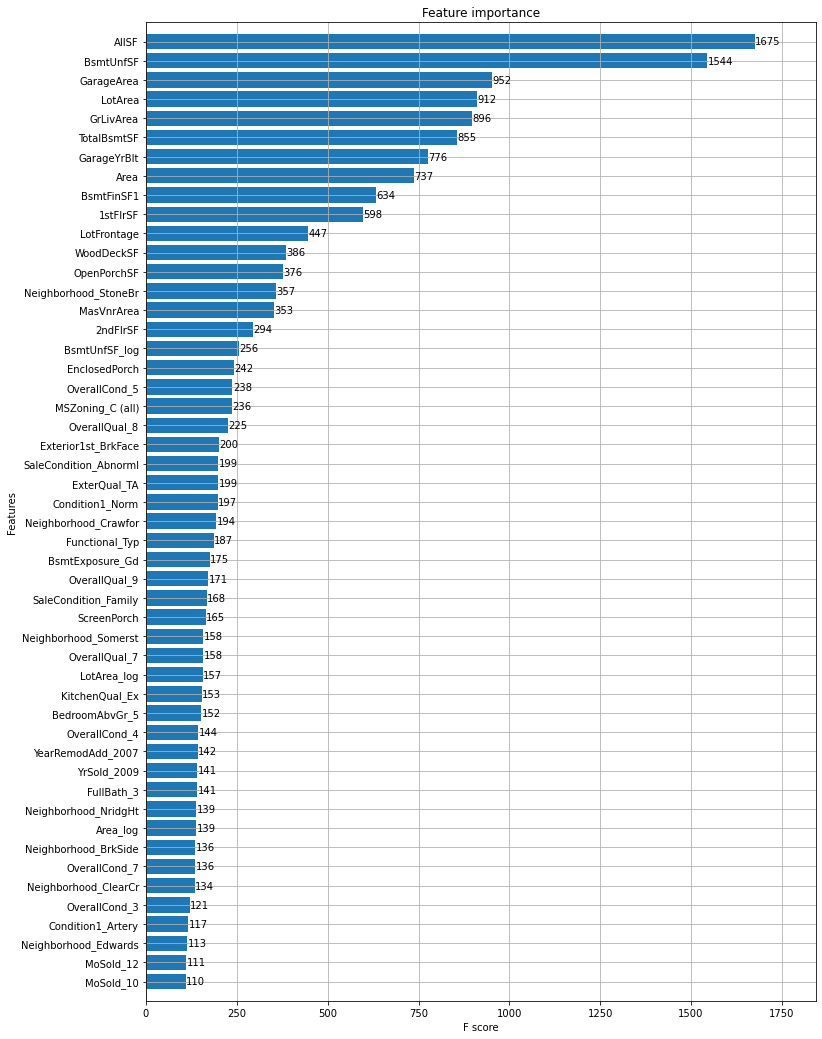

In [21]:
import matplotlib.pyplot as plt
# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf, max_num_features=50, height=0.8, ax=ax)
plt.show()